In [18]:
# Import necessary libraries
import pandas as pd  # Pandas is used for data manipulation and analysis
import re  # Regular expressions library for text processing
from nltk.corpus import stopwords  # NLTK's stopwords for natural language processing
from nltk.stem import PorterStemmer  # Porter stemmer for word stemming
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text to TF-IDF features
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # Logistic regression model for classification
from sklearn.metrics import classification_report, accuracy_score  # Metrics for evaluating model performance

# Load the dataset
data_path = 'IMDB_dataset.csv'  # Update with your CSV file path
df = pd.read_csv(data_path)  # Read the CSV file into a DataFrame

# Display the first few rows of the DataFrame
print(df.head())  # Print the first five rows of the DataFrame to see the structure of the data


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Code Explanation

Import Necessary Libraries:

import pandas as pd:

Purpose: This imports the Pandas library, which is essential for data manipulation and analysis, particularly for handling data in tabular format (like DataFrames).

import re:

Purpose: Imports the regular expressions library, used for searching and manipulating strings using pattern matching.

from nltk.corpus import stopwords:

Purpose: Imports a predefined list of stopwords from the Natural Language Toolkit (NLTK). These are common words (like "and", "the") that are typically removed in text processing to focus on more meaningful words.

from nltk.stem import PorterStemmer:

Purpose: Imports the Porter stemmer, a tool that reduces words to their base or root form (stemming). This helps in normalizing words for better text analysis.

from sklearn.feature_extraction.text import TfidfVectorizer:

Purpose: Imports the TF-IDF vectorizer from Scikit-learn. This tool transforms text documents into numerical feature vectors, representing the importance of each word in the context of the document and the overall dataset.

from sklearn.model_selection import train_test_split:

Purpose: Imports a function that splits the dataset into training and testing sets, which is crucial for evaluating the performance of machine learning models.

from sklearn.linear_model import LogisticRegression:

Purpose: Imports the logistic regression model from Scikit-learn. This is a popular algorithm for binary classification tasks (like sentiment analysis).

from sklearn.metrics import classification_report, accuracy_score:

Purpose: Imports functions to compute various performance metrics for the model, such as accuracy and detailed classification reports.
Load the Dataset:

data_path = 'IMDB_dataset.csv':

Purpose: This line sets the file path for the CSV file containing the IMDB dataset. It should be updated based on where the file is stored on your system.

df = pd.read_csv(data_path):

Purpose: Reads the CSV file into a Pandas DataFrame named df, allowing you to manipulate and analyze the data easily.
Display the First Few Rows of the DataFrame:

print(df.head()):

Purpose: This command prints the first five rows of the DataFrame to the console. It's a useful way to quickly inspect the structure of the dataset, including the columns and a preview of the data.

In [20]:
# Start NLTK for stop words and stemmer
import nltk  # Importing the NLTK library for natural language processing
nltk.download('stopwords')  # Download necessary data for stop words

# Set of English stop words
stop_words = set(stopwords.words('english'))  # Create a set of English stop words

# Initialize the Porter stemmer
stemmer = PorterStemmer()  # Create an instance of the Porter stemmer for stemming words

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert the text to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and numbers from the text
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)  # Remove stop words and stem the remaining words
    return text  # Return the cleaned text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Code Explanation

Start NLTK for Stop Words and Stemmer:

import nltk:

Purpose: This line imports the Natural Language Toolkit (NLTK), a powerful library for working with human language data in Python, facilitating tasks like text processing and analysis.

nltk.download('stopwords'):

Purpose: Downloads the stop words dataset from NLTK, which contains a list of common words in English that are typically ignored in text processing, such as "and", "the", and "is".

Set of English Stop Words:

stop_words = set(stopwords.words('english')):

Purpose: This line creates a set containing English stop words from the NLTK library. Using a set allows for faster lookups when filtering words later in the text cleaning process.

Initialize the Porter Stemmer:

stemmer = PorterStemmer():

Purpose: This line initializes an instance of the Porter stemmer, which is used to reduce words to their root form. Stemming helps in normalizing words, which is particularly useful for text analysis.

Text Cleaning Function:

def clean_text(text):

Purpose: This defines a function named clean_text that takes a string text as input and performs various cleaning operations on it.

text = text.lower():

Purpose: Converts all characters in the text to lowercase. This ensures uniformity, so "Word" and "word" are treated the same.

text = re.sub(r'[^\w\s]', '', text):

Purpose: Uses regular expressions to remove all punctuation marks and numbers from the text, leaving only words and whitespace.

text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words):

Purpose: This line processes the text by:

Splitting it into individual words.
Filtering out any stop words.
Stemming the remaining words to their root forms using the Porter stemmer.
Joining the cleaned words back into a single string.

return text:
Purpose: Returns the cleaned text as the output of the function.

In [21]:
# Apply the cleaning function to create a 'cleaned_review' column
df['cleaned_review'] = df['review'].apply(clean_text)  # Apply the clean_text function to each entry in the 'review' column

# Display the first few rows of the new column
print(df[['review', 'cleaned_review']].head())  # Print the original and cleaned reviews for comparison


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one review mention watch 1 oz episod youll hoo...  
1  wonder littl product br br film techniqu unass...  
2  thought wonder way spend time hot summer weeke...  
3  basic there famili littl boy jake think there ...  
4  petter mattei love time money visual stun film...  


In [22]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer to convert text data into numerical features

# Transform the cleaned review text into TF-IDF features
X = vectorizer.fit_transform(df['cleaned_review'])  # Fit the vectorizer on the cleaned reviews and transform them into a sparse matrix

# Define the target variable (sentiment)
y = df['sentiment']  # Set the target variable 'y' to the 'sentiment' column, which contains the labels

# Check the dimensions of the feature matrix
print("Feature matrix shape:", X.shape)  # Print the shape of the feature matrix to understand its size and dimensionality


Feature matrix shape: (50000, 142536)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# Use the train_test_split function to split the feature matrix X and target variable y into training and testing sets
# test_size=0.2 specifies that 20% of the data will be used for testing, and random_state ensures reproducibility of the split

# Check the dimensions of the training and testing sets
print("Training set size:", X_train.shape)  # Print the shape of the training feature matrix
print("Test set size:", X_test.shape)  # Print the shape of the testing feature matrix


Training set size: (40000, 142536)
Test set size: (10000, 142536)


In [24]:
# Create the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Initialize the Logistic Regression model with a maximum of 1000 iterations
# Increasing max_iter may lead to better convergence of the model during training

# Train the model on the training data
model.fit(X_train, y_train)  # Fit the model to the training data (X_train) and corresponding labels (y_train)

# Training process completed
print("Model training completed.")  # Print a message indicating that the model training is finished


Model training completed.


In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)  # Use the trained model to predict sentiments for the test feature set (X_test)

# Calculate performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))  # Calculate and print the accuracy of the predictions

# Display the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Generate and print a detailed classification report


Accuracy Score: 0.8925

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Classification Report Breakdown

The classification report provides detailed metrics that evaluate the performance of the model for each class. The report includes precision, recall, F1-score, and support for both the negative and positive sentiment classes.

Metrics Explained:

Precision:

Negative: 0.90

Positive: 0.88

Interpretation: Precision measures the proportion of true positive predictions relative to the total predicted positives. For example, a precision of 0.90 for the negative class means that 90% of the samples predicted as negative were actually negative. Similarly, 88% of the positive predictions were correct.

Recall:

Negative: 0.88

Positive: 0.91

Interpretation: Recall (also known as sensitivity) measures the proportion of true positive predictions relative to the total actual positives. A recall of 0.88 for the negative class indicates that the model correctly identified 88% of the actual negative reviews, while a recall of 0.91 for the positive class indicates it correctly identified 91% of the actual positive reviews.

F1-score:

Negative: 0.89

Positive: 0.89

Interpretation: The F1-score is the harmonic mean of precision and recall, providing a single score that balances both metrics. An F1-score of 0.89 for both classes indicates that the model has a good balance between precision and recall, making it effective in classifying both negative and positive reviews.

Support:

Negative: 4961

Positive: 5039

Interpretation: Support represents the number of actual occurrences of each class in the test dataset. There were 4,961 negative reviews and 5,039 positive reviews in the test set.

In [26]:
# Find incorrectly predicted samples
incorrect_predictions = X_test[y_test != y_pred]  # Select the feature vectors from X_test where the actual labels (y_test) do not match the predicted labels (y_pred)
incorrect_labels = y_test[y_test != y_pred]  # Store the actual sentiment labels for those incorrectly predicted samples
predicted_labels = y_pred[y_test != y_pred]  # Store the predicted sentiment labels for the incorrectly predicted samples

# Add the incorrect predictions to a DataFrame
incorrect_df = pd.DataFrame({  # Create a new DataFrame to store incorrect predictions
    'review': vectorizer.inverse_transform(incorrect_predictions),  # Convert the TF-IDF feature vectors back to original text using inverse_transform
    'actual': incorrect_labels,  # Include the actual labels for each review
    'predicted': predicted_labels  # Include the predicted labels for each review
})

# Display the first few incorrect predictions
print(incorrect_df.head())  # Print the first five rows of the DataFrame to see the misclassified reviews along with their actual and predicted labels


                                                  review    actual predicted
33553  [hene, borga, headshrink, tatanka, ludvig, lug...  positive  negative
49498  [infinnerti, quasimelfi, monkslap, antepurgato...  positive  negative
6113   [edisonbr, diniro, waterburi, braini, effortsb...  positive  negative
15118  [lewinski, relent, careerbut, excis, delet, an...  positive  negative
33109  [redband, taratula, mtvj, lethin, r1, rosenber...  positive  negative


In [27]:
# Combine stemmed words into a single string
incorrect_df['review'] = incorrect_df['review'].apply(lambda x: ' '.join(x))  # Apply a function to the 'review' column to join the list of words back into a single string for each review

# Display the first few incorrect predictions
print(incorrect_df[['review', 'actual', 'predicted']].head())  # Print the first five rows of the DataFrame, showing the review text, actual sentiment, and predicted sentiment


                                                  review    actual predicted
33553  hene borga headshrink tatanka ludvig luger sum...  positive  negative
49498  infinnerti quasimelfi monkslap antepurgatori p...  positive  negative
6113   edisonbr diniro waterburi braini effortsbr ill...  positive  negative
15118  lewinski relent careerbut excis delet anderson...  positive  negative
33109  redband taratula mtvj lethin r1 rosenberg lori...  positive  negative


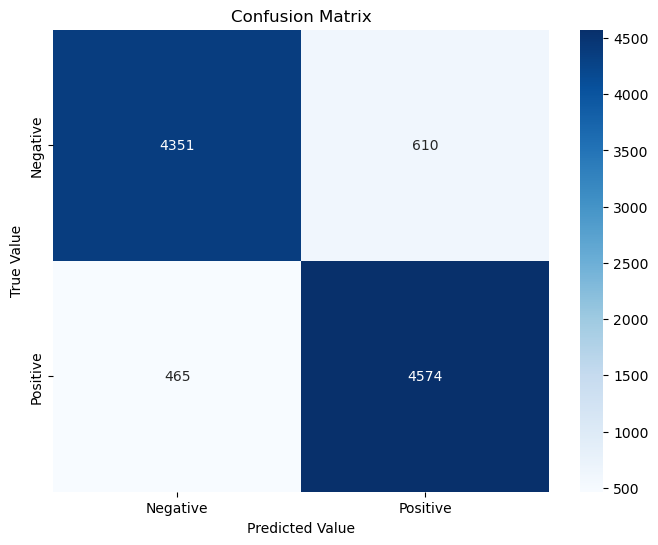

In [28]:
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib for plotting
import seaborn as sns  # Importing seaborn for enhanced data visualization
from sklearn.metrics import confusion_matrix  # Importing the confusion_matrix function for evaluating model performance

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)  # Calculate the confusion matrix using the true labels (y_test) and predicted labels (y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])  
# Create a heatmap of the confusion matrix with annotations, setting the color map to 'Blues' and labeling the axes

plt.ylabel('True Value')  # Label for the y-axis indicating true values
plt.xlabel('Predicted Value')  # Label for the x-axis indicating predicted values
plt.title('Confusion Matrix')  # Set the title of the plot
plt.show()  # Display the plot


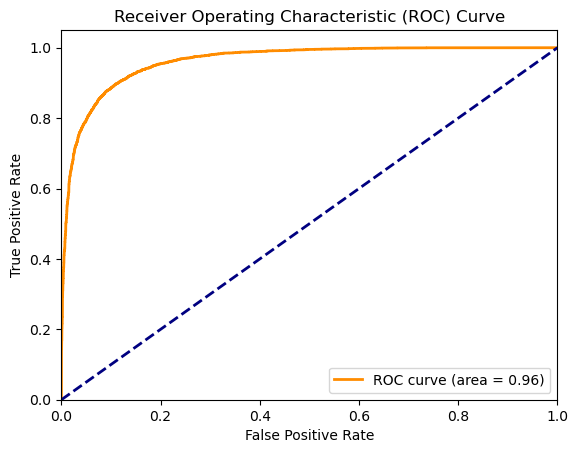

In [30]:
from sklearn.metrics import roc_curve, auc  # Importing functions to compute ROC curve and AUC

# Create the ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label='positive')  
# Compute false positive rate (fpr) and true positive rate (tpr) for different threshold values
# model.predict_proba(X_test)[:, 1] gets the predicted probabilities of the positive class

roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve (AUC) using fpr and tpr

# Plot the ROC curve
plt.figure()  # Create a new figure for the plot
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  
# Plot the ROC curve with the false positive rate on the x-axis and true positive rate on the y-axis
# The curve is labeled with the AUC value

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Plot a dashed diagonal line for the baseline
plt.xlim([0.0, 1.0])  # Set the x-axis limits from 0 to 1
plt.ylim([0.0, 1.05])  # Set the y-axis limits from 0 to 1.05

plt.xlabel('False Positive Rate')  # Label for the x-axis indicating false positive rate
plt.ylabel('True Positive Rate')  # Label for the y-axis indicating true positive rate
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Set the title of the plot
plt.legend(loc='lower right')  # Place the legend in the lower right corner of the plot
plt.show()  # Display the ROC curve plot


Explanation of Each Section:

Importing Functions:

The first line imports roc_curve and auc from sklearn.metrics, which are used to compute the ROC curve and the area under the curve (AUC), respectively.

Creating the ROC Curve:

The roc_curve function calculates the false positive rate (fpr) and true positive rate (tpr) at various threshold settings. The predicted probabilities for the positive class are obtained using model.predict_proba(X_test)[:, 1]. The pos_label parameter is set to 'positive', indicating which class is considered the positive class.

Calculating AUC:

The auc function computes the area under the ROC curve, providing a single scalar value that represents the overall performance of the model in distinguishing between the positive and negative classes.

Plotting the ROC Curve:

A new figure is created for the ROC curve plot.
The plt.plot function is used to create the ROC curve, plotting fpr on the x-axis and tpr on the y-axis. The line is styled and labeled with the AUC value for clarity.
A dashed line representing the baseline (where the model makes random predictions) is plotted from (0,0) to (1,1) to help visualize model performance relative to random guessing.
The x-axis and y-axis limits are set to provide a clear view of the curve.
Labels for the axes and a title for the plot are added for context.

Finally, plt.show() displays the ROC curve, allowing you to visually assess the model's performance in classifying the positive class.